In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from rentorbuy import RentOrBuy
from asset import annual_to_monthly_stdev, annual_to_monthly_return

### Insert variables
- `monthly_rent`: the monthly rent of an apartment similar to the one you want to buy.
- `house_price`: the price which you expect to pay for the house, i.e. listed price + overbid.
- `additional_monthly_costs`: any additional costs of ownership, e.g. condo fees.
- `additional_purchase_costs`: They include legal fees, title insurance, home inspection, home appraisal, etc.
- `down_payment`: the downpayment you expect to put on your mortgage.
- `mortgage_apr`: the interest on your mortgage in percentage, e.g. $5\%$ (including fees). The interest is assumed to be fixed for the whole loan term.
- `mortgage_amortization_years`: the years that will take you to repay the mortgage.
- `mortgage_additional_payments`: the monthly additional amount that you intend to use to repay your mortgage.
- `maintenance_cost`: the yearly maintenance costs as a percentage of the `house_price`.
- `monthly_property_tax_rate`: the monthly property tax on your house (annual property tax divided by 12).
- `annual_inflation`: the expected avg. annual rate of inflation over the term of the loan.
- `return_ret`: the expected avg. annual return of real estate investements in the area where you are planning to buy over the `mortgage_term`.

- `housing_asset_dict`: distribution of expected monthly returns on real estate (e.g. based on historical data).
- `investment_asset_dict`: distribution of expected monthly returns on alternative investment to real estate (e.g. low cost index fund).

In [2]:
mgt = RentOrBuy(
    monthly_rent=2200,
    house_price=570000,
    down_payment=0,
    mortgage_amortization_years=30,
    mortgage_apr=0.05,
    additional_purchase_costs=15000,
    additional_monthly_costs=300,
    mortgage_additional_payments=0,
    annual_inflation=0.02,
    monthly_property_tax_rate=0.000042,
    maintenance_cost=0.01,
    housing_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.02), 
            "scale":  annual_to_monthly_stdev(0.06)}
    },
    investment_asset_dict={
        "dist": np.random.normal, 
        "dist_args": {
            "loc": annual_to_monthly_return(0.06), 
            "scale":  annual_to_monthly_stdev(0.12)}
    },
)

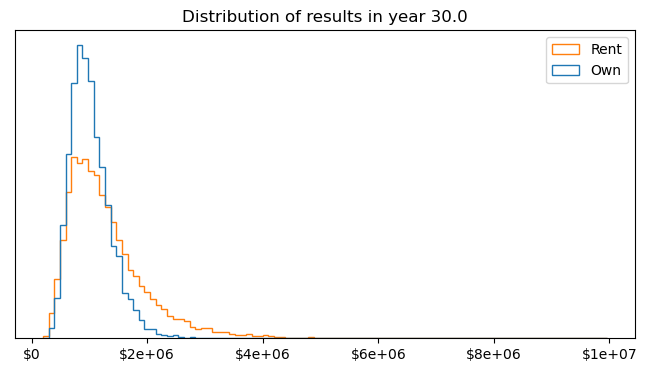

In [3]:
mgt.histogram(period=360)

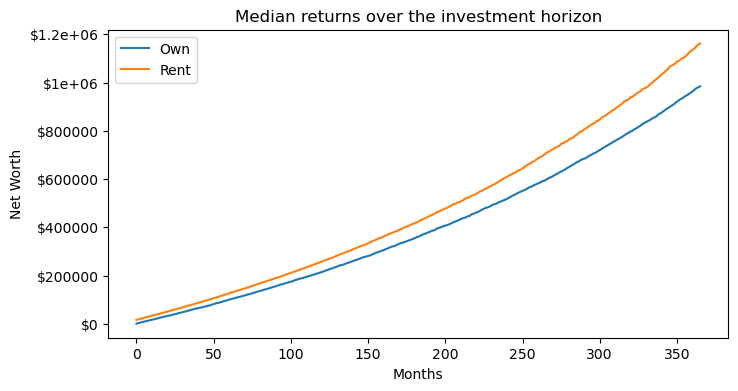

In [4]:
mgt.median_returns_plot()

In [6]:
mgt.mortgage_df

,Begin_balance,Payment,Principal,Interest,Additional_payment,End_balance,total_payment
Date,,,,,,,
2022-11-01,570000.00,3021.31,670.68,2350.63,0,569329.32,3021.31
2022-12-01,569329.32,3021.31,673.44,2347.87,0,568655.88,3021.31
2023-01-01,568655.88,3021.31,676.22,2345.09,0,567979.66,3021.31
2023-02-01,567979.66,3021.31,679.01,2342.30,0,567300.65,3021.31
2023-03-01,567300.65,3021.31,681.81,2339.50,0,566618.84,3021.31
...,...,...,...,...,...,...,...
2052-12-01,14136.55,3021.31,2963.01,58.30,0,11173.54,3021.31
2053-01-01,11173.54,3021.31,2975.23,46.08,0,8198.31,3021.31
2053-02-01,8198.31,3021.31,2987.50,33.81,0,5210.81,3021.31
